# Introdução à análise exploratória de dados

Prof. Wagner Hugo Bonat LEG/UFPR

Programa de Especialização em Data Science e Big Data


## Objetivo

O objetivo deste tutorial é discutir aspectos básicos de análise exploratória de dados através da linguagem python. Um conjunto de dados reais obtidos da iOS app store é usado para exemplificação dos conceitos. Especificamente, vamos discutir os seguintes pontos

1. Leitura e estrutura da base de dados.
    - Carregando arquivos .csv da web.
2. Introdução à análise exploratória de dados
    - Tabelas de frequência;
    - Medidas de tendência central e dispersão;
    - Gráfico de pizza (pie chart);
    - Grafico de barras (bar plot);
    - Heat map.
    - Histrogramas;
    - Diagramas de dispersão;
    - Boxplots.


# Aplicativos da iOS app store

Este conjunto de dados refere-se a mais de 7000 Apple iOS mobile aplicativos disponíveis na apple app store. 
Os dados foram extraídos via web scrap usando iTunes Search API da Apple Inc website. Os dados estão disponíveis na forma de dois arquivos .csv através da plataforma Kaggle no seguinte endereço [Kaggle conjunto de dados I](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home). Neste momento vamos trabalhar apenas com o arquivo AppleStore.csv que contêm as seguintes colunas:

- id: App ID;
- track_name: Nome do aplicativo;
- size_bytes: Tamanho em bytes;
- currency: Tipo de moeda de venda;
- price: Preço de venda;
- rating_count_tot: Número de avaliações dos usuários (todas as versões);
- rating_count_ver: Número de avaliações dos usuários (versão atual);
- user_rating: Média das avaliações dos usuários (todas as versões);
- user_rating_ver: Média das avaliações dos usuários (versão atual);
- ver: Código da última versão.
- cont_rating: Categoria de conteúdo.
- prime_genre: Genero primário.
- sup_devices.num: Número de dispositivos suportados;
- ipadSc_urls.num: Número de screenshots para mostrar;
- lang.num: Número de línguas suportadas;
- vpp_lic: Vpp Device Based Licensing Enabled

Como uma complementação a esta base de dados o arquivo appleStore_description.csv traz os seguintes dados:

- id: App ID (unifica as bases);
- track_name: Nome do aplicativo;
- size_bytes: Tamanho em bytes;
- app_desc: Descrição do aplicativo.

Neste curso para manipular bases de dados vamos usar o pacote [pandas](https://pandas.pydata.org/). 
O comando python abaixo carrega a biblioteca pandas e atribui a esta biblioteca o alias pd. 
Também carregamos duas outras bibliotecas para facilitar a leitura da base de dados direto da url.

In [1]:
import pandas as pd
import io
import requests

Adicionalmente, vamos também carregar algumas biblioteca para visualização de dados usando o mecanismo inline.
O mecanismo inline permite visualizar os gráficos imediatamente como parte da Jupyter notebook.

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

O próximo passo é indicar o caminho web onde a base de dados esta disponível.

In [3]:
url = "http://www.leg.ufpr.br/~wagner/DataSet/AppleStore.csv"

Para a importação correta da base de dados três argumentos da função read_csv são essenciais: Primeiro o sep que indica qual é o caracter delimitador, neste caso ",". O argumento header indica qual linha da base de dados contêm o nome das colunas. Em geral a primeira linha da base contêm o nome das colunas. Entretando, lembre-se que o python começa seus índices em zero, sendo assim, header = 0. Finalmente, o argumento index_col indica qual coluna contêm o nome das linhas. Neste caso, novamente é a primeira coluna e consequentemente index_col = 0. 
Estamos prontos para carregar a base de dados e fazer uma descrição rápida para verificar se a importação foi bem sucedida.

In [4]:
dados1 = pd.read_csv(url, sep = ",", index_col = 0, header = 0)
dados1.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Podemos identificar o tipo de dado que temos em cada coluna da base de dados.

In [5]:
dados1.dtypes

id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

Uma descrição rápida das variáveis quantitativas da base de dados pode ser obtida pela função .describe().

In [6]:
dados1.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


A função .describe() retorna o número de observações (count), a média (mean) o desvio padrão (std), minimo (min), máximo (max) e os quantis de 25%, 50% (mediana) e 75%. 
Para as variáveis qualitativas, por exemplo, genero primário podemos resumir a informação através de uma tabela de frequências absoluta.

In [7]:
dados1["prime_genre"].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

Outra opção é uma tabela com frequências relativas.

In [8]:
pd.crosstab(index = dados1["prime_genre"], columns = "count", normalize = 'all')*100

col_0,count
prime_genre,
Book,1.556204
Business,0.791997
Catalogs,0.138947
Education,6.294289
Entertainment,7.433653
Finance,1.445047
Food & Drink,0.875365
Games,53.661248
Health & Fitness,2.501042


Uma forma alternativa de ver variáveis qualitativas é usando um gráfico de pizza (pie chart). 
Entretanto, quando a variável tem muitos níveis como no caso do prime_genre este tipo de gráfico é de dificil visualização. Neste caso, apenas para exemplificação, vamos plotar a variável cont_rating. Você pode tentar fazer o mesmo para a variável prime_genre.

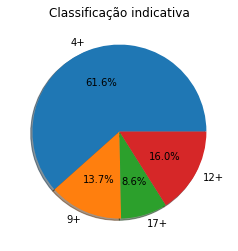

In [9]:
contagem = pd.value_counts(values = dados1["cont_rating"], sort = False)
labels = contagem.index
plt.pie(contagem, labels = labels, autopct='%1.1f%%', shadow=True)
plt.title('Classificação indicativa')
plt.show()

Alternativamente, pode-se também usar um gráfico de barras.

Text(0.5, 1.0, 'Classificação indicativa')

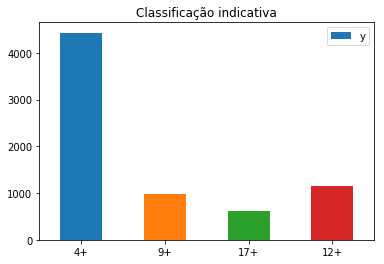

In [10]:
dados_plot = pd.DataFrame({"y": contagem, "x": labels})
pp2 = dados_plot.plot.bar(rot = 0, y = 'y')
plt.title('Classificação indicativa')

Podemos usar o mesmo estilo de gráfico para visualizar a variável prime_genre.

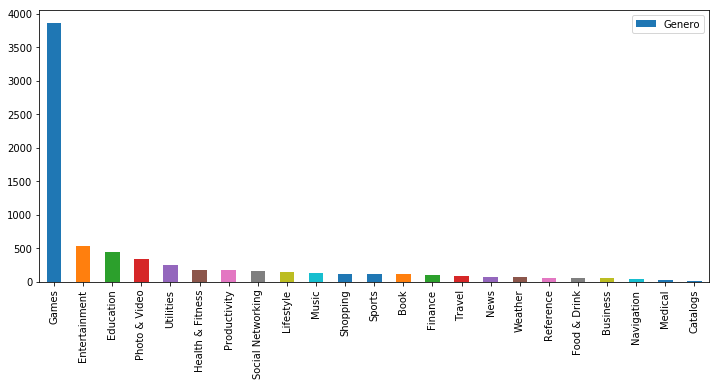

In [11]:
contagem = pd.value_counts(values = dados1["prime_genre"], sort = True)
labels = contagem.index
dados_plot = pd.DataFrame({"Genero": contagem, "x": labels})
pp2 = dados_plot.plot.bar(y = 'Genero', figsize = (12,5))

Uma situação recorrente é quando queremos visualizar o comportamento conjunto de duas variáveis de interesse, sendo ambas qualitativas. Neste caso, a medida descritiva mais popular é uma tabela de dupla entrada. Por exemplo, considerando as variáveis prime_genre e Cont_rating, temos a seguinte tabela. Por uma questão intuitiva é importante mostrar os níveis da variável cont_rating que é categórica ordinal em sua ordem natural, ou seja, 4+, 9+, 12+ e 17+. Para isto, convertemos a coluna cont_rating para categórica e ordenamos seus níveis. Após, isso procedemos com a contrução da tabela de dupla entrada.

In [12]:
dados1["cont_rating"] = pd.Categorical(dados1["cont_rating"], categories = ["4+","9+","12+","17+"], ordered = True)
tabela2 = pd.crosstab(index = dados1["prime_genre"], columns = dados1["cont_rating"])
tabela2

cont_rating,4+,9+,12+,17+
prime_genre,,,,
Book,63,11,20,18
Business,54,0,1,2
Catalogs,6,1,1,2
Education,432,6,8,7
Entertainment,285,44,108,98
Finance,75,0,5,24
Food & Drink,44,0,11,8
Games,2079,865,741,177
Health & Fitness,141,5,19,15


Note que neste caso é interessante padronizarmos a tabela em algum sentido para que os números sejam comparáveis, por exemplo, entre generos. Para isso, usamos o argumento normalize. Este argumento permite normalizar a tabela por linhas (normalize = 'index') por colunas (normalize = 'columns') ou a matriz toda (normalize = 'all'). 
Na prática, qual opção será usada depende dos objetivos da visualização. Por exemplo, se o interesse é olhar por produto faz sentido normalizar por linha, assim podemos comparar o percentual de cada produto em cada uma das categorias.

In [13]:
tabela2 = pd.crosstab(index = dados1["prime_genre"], columns = dados1["cont_rating"], normalize = 'index')
tabela2

cont_rating,4+,9+,12+,17+
prime_genre,,,,
Book,0.562500,0.098214,0.178571,0.160714
Business,0.947368,0.000000,0.017544,0.035088
Catalogs,0.600000,0.100000,0.100000,0.200000
Education,0.953642,0.013245,0.017660,0.015453
Entertainment,0.532710,0.082243,0.201869,0.183178
Finance,0.721154,0.000000,0.048077,0.230769
Food & Drink,0.698413,0.000000,0.174603,0.126984
Games,0.538322,0.223977,0.191869,0.045831
Health & Fitness,0.783333,0.027778,0.105556,0.083333


Podemos também mostrar a tabela de forma ordenada com o objetivo de identificar facilmente quais gêneros são mais indicados para cada Classificação indicativa.

In [14]:
tabela2.sort_values(["4+"], ascending = False)

cont_rating,4+,9+,12+,17+
prime_genre,,,,
Education,0.953642,0.013245,0.017660,0.015453
Business,0.947368,0.000000,0.017544,0.035088
Weather,0.916667,0.000000,0.055556,0.027778
Productivity,0.887640,0.022472,0.011236,0.078652
Navigation,0.869565,0.000000,0.086957,0.043478
Photo & Video,0.816619,0.040115,0.100287,0.042980
Health & Fitness,0.783333,0.027778,0.105556,0.083333
Travel,0.777778,0.012346,0.098765,0.111111
Music,0.739130,0.028986,0.202899,0.028986


Uma forma alternativa de visualizar a relação entre duas variáveis qualitativas (nominal ou ordinal) é através de um gráfico de mosaico (mosaic plot). No entanto, tal tipo de gráfico é mais indicado para variáveis qualitativas com poucos níveis. Vamos voltar a este tipo de gráfico nos próximos capítulos. Uma alternativa para visualizar uma tabela de dupla entrada é usar um heatmap, como mostrado abaixo. 

**NOTA O CÓDIGO ABAIXO PRECISA INSTALAR O seaborn.**

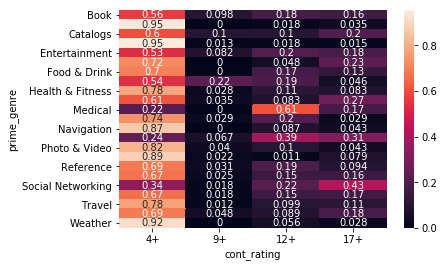

In [15]:
import seaborn as sns
sns.heatmap(tabela2, annot=True)
plt.show()

Até o momento vimos as principais formas de apresentar variáveis qualitativas nominais e ordinais, bem como, a relação entre elas. 
De forma similar, para apresentar a distribuição de variáveis quantitativas discretas ou contínuas podemos usar gráfico de barras (quantitativa discreta com poucos valores) e histogramas (quantitativas contínuas ou discreta com muitos valores). Para exemplificar, considere a variável preço (price), cujo histograma é apresentado abaixo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77bcf116a0>]],
      dtype=object)

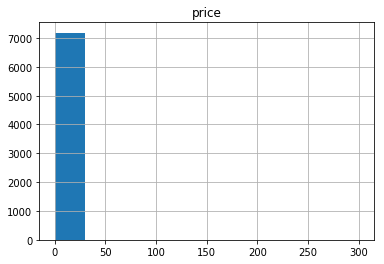

In [16]:
dados1.hist(column='price')

Infelizmente, o gráfico não parece muito informativo. Isso é devido ao fato da distribuição da variável preço ser muito assimétrica, ou seja, temos muitos valores pequenos e apenas alguns valores elevados. Podemos, transformar a variável preço para induzir simétria e ter uma melhor visão de sua distribuição. Uma possível transformação é o logaritmo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77bb63b2e8>]],
      dtype=object)

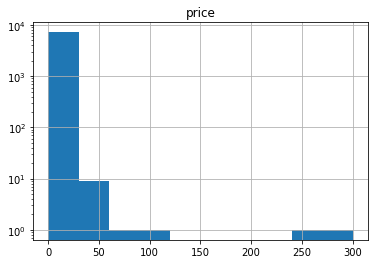

In [17]:
dados1.hist(column='price', log = True)

Vamos verificar a distribuição de algumas das outras variáveis contínuas em nossa base de dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77bd07b710>]],
      dtype=object)

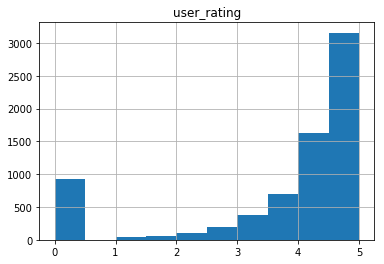

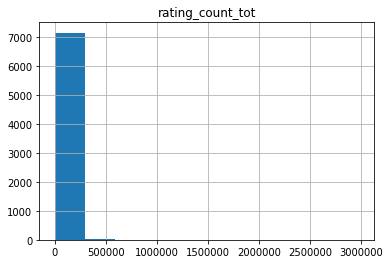

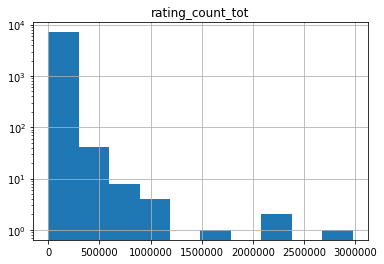

In [18]:
dados1.hist(column='user_rating', log = False)
dados1.hist(column='rating_count_tot', log = False)
dados1.hist(column='rating_count_tot', log = True)

Um segundo objetivo com variáveis quantitativas pode ser verificar uma possível associação entre elas. Por exemplo, aplicativos com mais rating são os com melhores avaliações? 
Para visualizar a relação entre duas variáveis quantitativas o gráfico mais popular é o diagrama de dispersão.

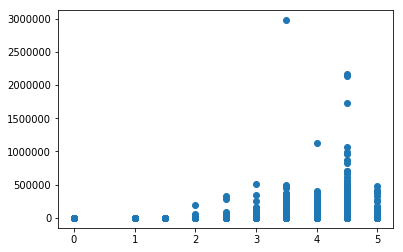

In [19]:
plt.scatter(x = dados1["user_rating"], y = dados1["rating_count_tot"])

Finalmente, temos o caso de verificar o comportamento de uma variável contínua de acordo com o comportamento de uma qualitativa que pode ser nominal ou ordinal. A forma mais simples de visualizar a relação entre uma variável quantitativa e uma qualitativa é através de boxplots construídos baseados na variável contínua por nível da variável qualitativa. Por exemplo, suponha que desejamos comparar as avaliações (contínua) entre os tipos de aplicativos (qualitativa nominal). 

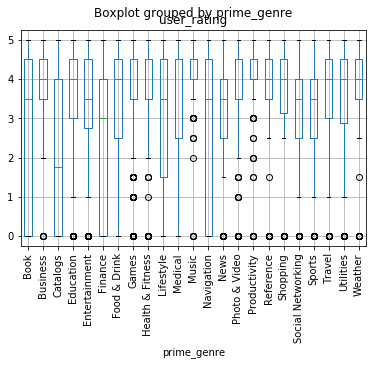

In [20]:
dados1.boxplot("user_rating", "prime_genre", rot = 90)

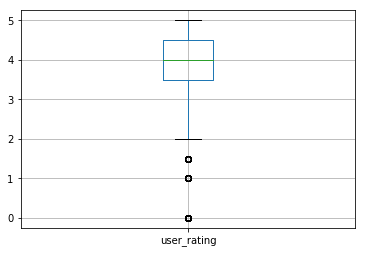

In [21]:
dados1.boxplot("user_rating")

Neste primeiro tutorial vimos os tipos básicos de tabelas e gráficos de acordo com o tipo das variáveis consideradas.